# Lab 1: Perceptron 

In this lab, you will implement the Perceptron learning algorithm discussed in class.

Let's start by importing some libraries and examining the data.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Loading data

You are given an artificial dataset (iris.data) to study the perceptron learning algorithm.



The data set consists of 100 samples from each of two species of Iris (Iris Setosa and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

   Attributes
- Sepal length: (cm)
- Sepal width: (cm)
- Petal length: (cm)
- Petal width: (cm)



 Labels
- setosa: -1
- versicolor: 1

To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris data set. The perceptron rule is not restricted to two dimensions, however, we will only consider the two features, sepal length and petal length, for visualization purposes.

We extract the first feature column (sepal length) and the third feature column (petal length) of those 100 samples and assign them to X_train and X_test.

The corresponding labels of X_train and X_test are stored in y_train and y_test, respectively, with 1 representing Versicolor and -1 representing Setosa.

After running the code below, you will get:


- X_train: 80 training samples with size (80, 2)
- y_train: 80 training labels with size (80, )
- X_test: 20 test samples with size (20, 2)
- y_test: 20 test labels with size (20, )

In [4]:
def show_iris():
    df = pd.read_csv('iris.data', header=None, sep='\s+| ',
                       names=['c1','c2','c3','c4','y'], engine='python')

    y = df.iloc[0:100, 4].values
    
    X = df.iloc[0:100, [0,2]].values
    plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
    plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
    plt.xlabel('petal length')
    plt.ylabel('sepal length')
    plt.legend(loc='upper left')
    plt.show()

In [5]:
def get_perceptron_data():
    data = pd.read_csv('iris.data', header=None, sep='\s+| ',
                       names=['c1','c2','c3','c4','y'], engine='python').to_numpy()
    
    
    
    X_train, X_test = data[:80, 0:4:2],data[80:, 0:4:2]
    y_train, y_test = data[:80:, -1], data[80:, -1]
    
    return X_train, y_train, X_test, y_test

## Plot iris data

We can visualize via a two-dimensional scatter plot using the matplotlib.

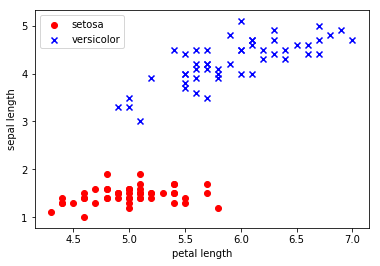

In [6]:
show_iris()

In [7]:
X_train, y_train, X_test, y_test = get_perceptron_data()

In [8]:
X_all = np.concatenate((X_train,X_test),axis=0)
y_all = np.concatenate((y_train,y_test),axis=0)

## Get accuracy

This function computes how well your model performs using accuracy as a metric.

In [9]:
def get_acc(pred, y_test):
    return np.sum(y_test==pred)/y_test.shape[0]*100

## Perceptron

Perceptron has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according the perceptron update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

The following code: 
- The train function of the Perceptron class is trained on the training data.

Training Algorithm:

for each epcoh:<br />
$\quad$  for each training sample ($x^{n}$,$y^{n}$):<br />
$\quad$$\quad$   $\hat{y} = \mathrm{sign} (w^Tx^n)$<br />
$\quad$$\quad$   if $\hat{y}$ != $y^{n}$:<br />
$\quad$$\quad$$\quad$Update weights and bias:<br />
$\quad$$\quad$$\quad$$\quad$$  w_{t+1}  \gets w_{t} +\eta y^{n} x^{n}  $<br />
$\quad$$\quad$$\quad$$\quad$$  b_{t+1}  \gets b_{t} +\eta y^{n} $<br />

- We use the predict function to find the training accuracy as well as the testing accuracy.

In [10]:
"""
Initialises Perceptron classifier with initializing 
alpha(learning rate) and number of epochs.
"""

alpha = 0.5
epochs = 100


def predict(w, b, X_test):
    """
    Predict labels for test data using the trained weights.

    Inputs:
    - X_test: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D. Or a numpy array shape (D, ).

    Returns:
    - pred: A numpy array of shape (num_test, ) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  Or a simple number.
    """

    A = np.dot(X_test, w) + b
    pred = np.where(A >=0.0,1,-1)

    return pred

def train(X_train, y_train):
    """
    Train the Perceptron classifier. Use the perceptron update rule
    as introduced in class.

    Inputs:
    - X_train: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y_train: A numpy array of shape (num_train, ) containing the training labels, where
         y[i] is the label for X[i].
    """
    # weights : w with size (D, )
    # bias : b is a constant
    w = np.zeros([X_train.shape[1]])
    b = 0

    for i in range(epochs):

        for j in range(X_train.shape[0]):

            # get one training example
            input_x = X_train[j]
            # compute the prediction using current weights and bias
            y_hat = predict(w, b, input_x)
            
            # if the prediction does not match the ground truth, update weights and bias
            if y_hat != y_train[j]:
                w = w +  alpha * y_train[j] * input_x
                b = b +  alpha * y_train[j]
    
    return w, b


### Train perceptron

In [11]:
w, b = train(X_train, y_train)

In [12]:
pred_percept = predict(w, b, X_train)
print('The training accuracy is given by : %f' % (get_acc(pred_percept, y_train)))

The training accuracy is given by : 100.000000


### Test perceptron

In [13]:
pred_percept = predict(w, b, X_test)
print('The testing accuracy is given by : %f' % (get_acc(pred_percept, y_test)))

The testing accuracy is given by : 100.000000


### Visualize the decision boundaries

To visualize the decision boundaries for our dataset, let's implement a small convenience function.

In [14]:
def plot_decision_regions(w, b, X, y, resolution=0.02):
   
    # setup marker generator and color map
    markers = ('s', 'x' )
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = predict(w, b, np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
  
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    
    
    for idx, cl in enumerate(np.unique(y)):
        a = y==cl
        plt.scatter(x=X[a, 0], y=X[a, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

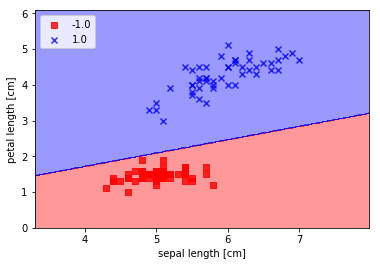

In [15]:
plot_decision_regions(w, b, X_all, y_all)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')